# Welcome to Python for Data Science!
Today we'll explore the world of Pandas. We will be using a timeseries dataset from the UCI Machine Learning repository to learn to how to wrangle data and perform analysis. In the second half of the day you'll do some feature engineering and finally there will be room to build a small model to actually put your features to use!

<img src="https://miro.medium.com/max/1400/1*1oVjIRY3Bnmbw-idCtg4BQ@2x.jpeg" style="width: 60%;"/>

## In this part we'll cover the following topics:
- Data ingestion
- Data cleaning
- Data exploration (specifically timeseries)
- Storing your data (you'll need it in the next part).

## Downloading data from UCI
Use the extract method that is applicable for you. If you have any issues with these steps, please ask for help.

In [1]:
! mkdir -p data && curl -L https://github.com/JelmerOffenberg/datamind-python/blob/master/data/dataset.zip?raw=true --output ./data/dataset.zip && unzip ./data/dataset.zip -d ./data && mv -f ./data/household_power_consumption.txt ./data/household_power_consumption.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19.6M  100 19.6M    0     0  9002k      0  0:00:02  0:00:02 --:--:-- 37.1M
Archive:  ./data/dataset.zip
  inflating: ./data/household_power_consumption.txt  


## Getting started
First things first, import the following libraries: `pandas`, `matplotlib` and `numpy`

In [2]:
# Your solution
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


---

# Ingestion
The first step in the data science process is data collection. In this section we'll load in some data. Information about the dataset that we'll be loading is located [here](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption).

**Exercise:**
* Load the power consumption dataset from the data folder
* Inspect the top 5 rows
* Check the data types of the dataframe and answer the following questions:
    * What's wrong with the data types in the info panel?
    * What data types would you expect for each column?
    * Does it make sense to have date and time columns separated?
    

In [81]:
# Your solution
power_consumption = pd.DataFrame(pd.read_csv("./data/household_power_consumption.csv", sep =";"))


<ipython-input-81-427fd3e4068a>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  power_consumption = pd.DataFrame(pd.read_csv("./data/household_power_consumption.csv", sep =";"))


In [92]:
power_consumption = pd.DataFrame(pd.read_csv("./data/household_power_consumption.csv", sep=";", na_values=["?", "NA", ""]))


In [95]:
power_consumption.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [96]:
power_consumption.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [97]:
power_consumption["Datetime"] = pd.to_datetime(power_consumption["Date"] + " " + power_consumption["Time"], format="%d/%m/%Y %H:%M:%S")
power_consumption

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


---

# Data cleaning
In this section you're going to do some data cleaning. Since this is a timeseries dataset, you'll need to make it more usable before we can continue.
- Add date and time columns together and make a single datetime variable. Verify that your new column has the right data type and is correct. The result should be a datetime64\[ns\] object.
- Remove the date and time column from the dataset.
- Have a look at our variable of interest; `Global_active_power`
    - What data type was assigned by pandas to this variable? Does this make sense?
    - Try casing the variable to the right data type, what do you see?
    - Can you explain this behaviour?
    - Fix the way you load data and rerun your code
    - What change occurred with the data types?
- If you read the dataset description in the previous step, it seems that we can construct a column with the **total energy consumption per minute in watt-hour** on the columns that are available. Do this and name this column `power`.

    

In [98]:
# Your solution

power_consumption.drop(["Date", "Time"], axis=1, inplace=True)
power_consumption



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [100]:
power_consumption["power"] = ((power_consumption["Global_active_power"]*1000/60) - power_consumption["Sub_metering_1"] - power_consumption["Sub_metering_2"] - power_consumption["Sub_metering_3"])

In [101]:
power_consumption["power"]

,power
0,52.266667
1,72.333333
2,70.566667
3,71.800000
4,43.100000
...,...
2075254,15.766667
2075255,15.733333
2075256,15.633333
2075257,15.566667


## Missing values
Find out if there are weird of missing values in the data. Try to identify the rows and columns and answer the following questions.
- are there any missing values in the data set?
- if so, which column(s) contain missing values?
- if there are any missing values, extract the rows and the number of rows that contain missing values
- What would be a good way to deal with the missing values?
- Use your prefered approach to deal with the missing values. Validate if there are any missing values left in your data

In [109]:
# Your solution
power_missing = power_consumption.isna().sum()
power_missing


,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
Datetime,0
power,25979


---

# Creating a timeseries
In this section we'll combine some data wrangling with data exploration.
- The data contains a timeseries, however the current index of the dataframe does not really show this. Change the index to our newly created datetime column so that we end up with a datetime index.

In [110]:
# Your solution
power_consumption.set_index(power_consumption["Datetime"],inplace=True)

## Plotting
- Having a dataframe with a timeseries index allows us to some funky tricks
    - Plot the `power` column, is this useful?
    - Create the same plot on the following aggregation levels:
        - Mean per year
        - Mean per 3 months
        - Mean per week
        - Mean per week and median per week
    - Explore the use of `transform` on resampled data. What is the difference with running a normal aggregation function such as `.mean()` on resampled data? Show the differences below.
    - When would you `transform`?    

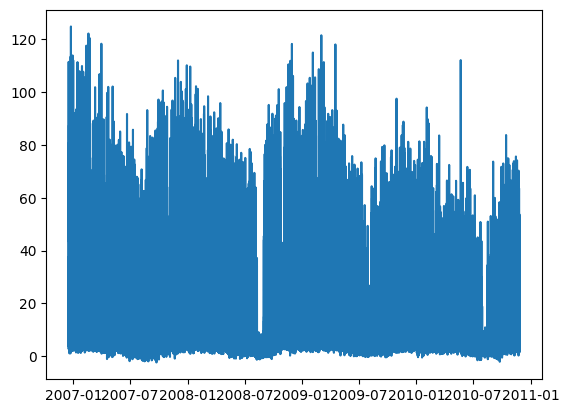

In [115]:
# Your solution
plt.plot(power_consumption["power"])

<ipython-input-119-78785fa9e749>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  power_consumption.resample("Y")["power"].mean().plot()


<Axes: xlabel='Datetime'>

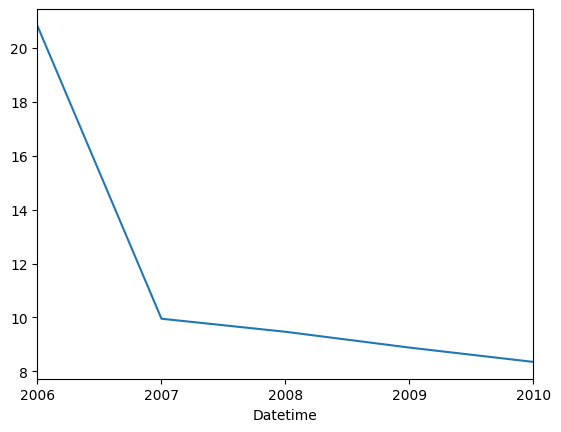

In [119]:
power_consumption.resample("Y")["power"].mean().plot()


<ipython-input-120-3e1236000f00>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  power_consumption.resample("Q")["power"].mean().plot()


<Axes: xlabel='Datetime'>

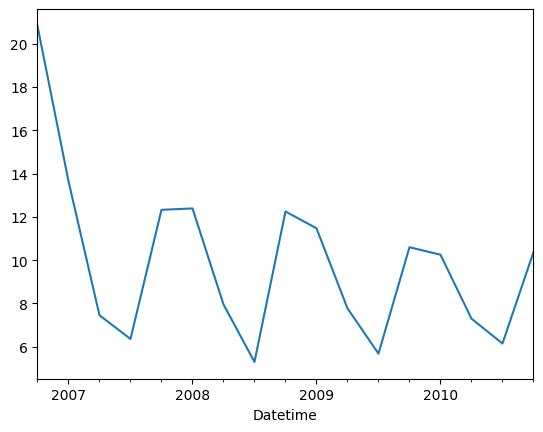

In [120]:
power_consumption.resample("Q")["power"].mean().plot()

<Axes: xlabel='Datetime'>

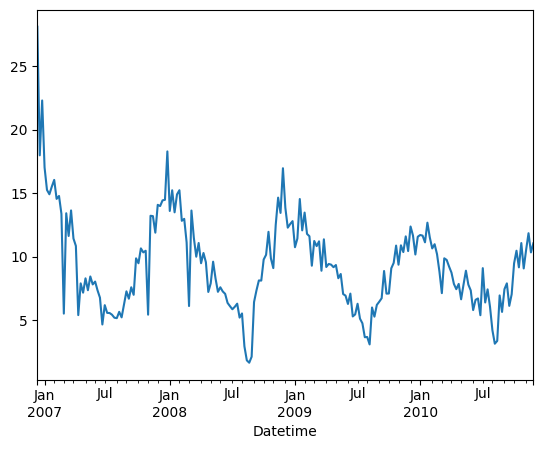

In [121]:
power_consumption.resample("W")["power"].mean().plot()

<Axes: xlabel='Datetime'>

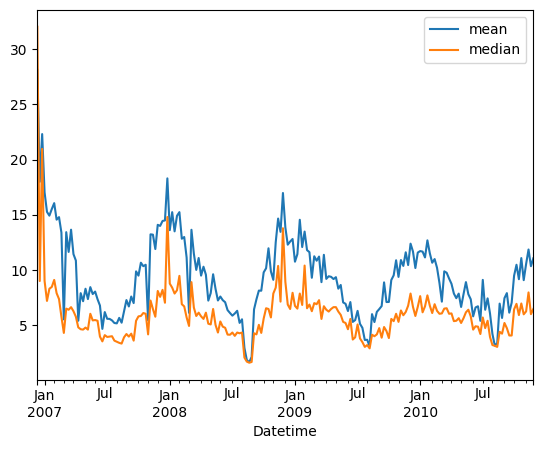

In [122]:
power_consumption.resample("W")["power"].agg(["mean", "median"]).plot()

## Creating helper functions
Instead of changing our code every time, we can create a function that will return the plot(s) that we need. In addtion, creating a function allows you to test your code which a good software engineering practice. For more information on functions, see this [link](https://www.tutorialspoint.com/python/python_functions.htm). Write a function that can do the following:
- The function can take in a dataframe, one or more column names, the aggregation level and one or more aggregation metrics (for instance mean or sum).
- The function should output the graph

<ipython-input-135-3d04b5d6516c>:3: FutureWarning: The provided callable <function mean at 0x79fa0431eb60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return dataframe.resample(agg_lvl)[columns].agg(agg_metrics).plot()
<ipython-input-135-3d04b5d6516c>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  return dataframe.resample(agg_lvl)[columns].agg(agg_metrics).plot()
<ipython-input-135-3d04b5d6516c>:3: FutureWarning: The provided callable <function mean at 0x79fa0431eb60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return dataframe.resample(agg_lvl)[columns].agg(agg_metrics).plot()
<ipython-input-135-3d04b5d6516c>:3: FutureWarning: 'Q' is deprecated and will be removed in a fut

<Axes: xlabel='Datetime'>

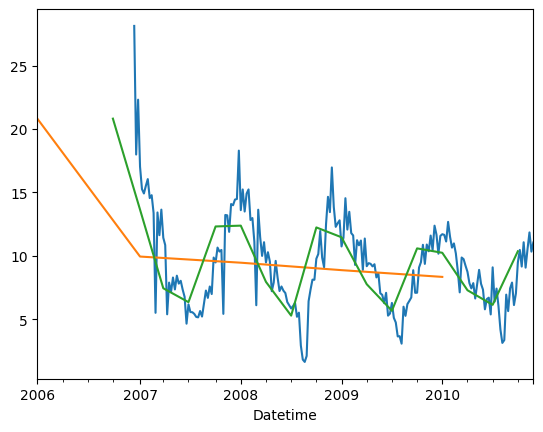

In [135]:
# Your solution
def plotter(dataframe, columns, agg_lvl, agg_metrics):
  return dataframe.resample(agg_lvl)[columns].agg(agg_metrics).plot()

plotter(power_consumption, "power", "W", np.mean)
plotter(power_consumption, "power", "Y", np.mean)
plotter(power_consumption, "power", "Q", np.mean)




---

# Assignment 1:
Now that you've seen how to wrangle the data and create some plots, it's time to find the answer to the following questions:
- Q1: Find the month with the most power consumption
- Q2: Find the top three weeks with the most power consumption
- Q3: What week had the largest difference between what was consumed at the most and the least?
- Q4: What was the average power consumption on the weekends?
        

<ipython-input-135-3d04b5d6516c>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return dataframe.resample(agg_lvl)[columns].agg(agg_metrics).plot()
<ipython-input-135-3d04b5d6516c>:3: FutureWarning: The provided callable <function mean at 0x79fa0431eb60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return dataframe.resample(agg_lvl)[columns].agg(agg_metrics).plot()


<Axes: xlabel='Datetime'>

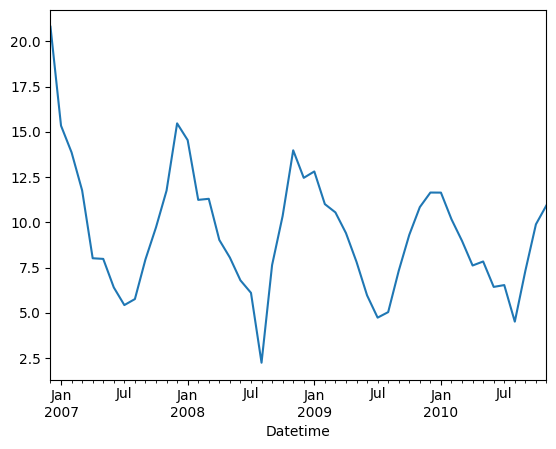

In [136]:
# Your solution
plotter(power_consumption, "power", "M", np.mean)

<ipython-input-135-3d04b5d6516c>:3: FutureWarning: The provided callable <function mean at 0x79fa0431eb60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return dataframe.resample(agg_lvl)[columns].agg(agg_metrics).plot()


<Axes: xlabel='Datetime'>

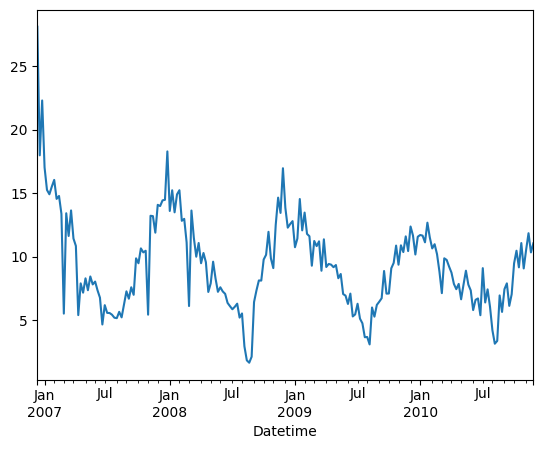

In [137]:
plotter(power_consumption, "power", "W", np.mean)

<ipython-input-135-3d04b5d6516c>:3: FutureWarning: The provided callable <function mean at 0x79fa0431eb60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return dataframe.resample(agg_lvl)[columns].agg(agg_metrics).plot()


<Axes: xlabel='Datetime'>

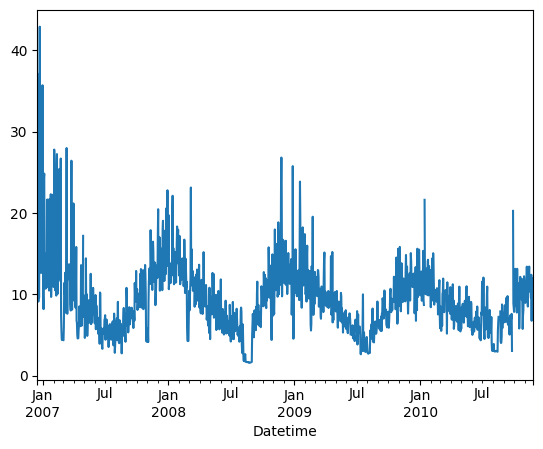

In [138]:
plotter(power_consumption, "power", "D", np.mean)

<ipython-input-135-3d04b5d6516c>:3: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  return dataframe.resample(agg_lvl)[columns].agg(agg_metrics).plot()


<Axes: xlabel='Datetime'>

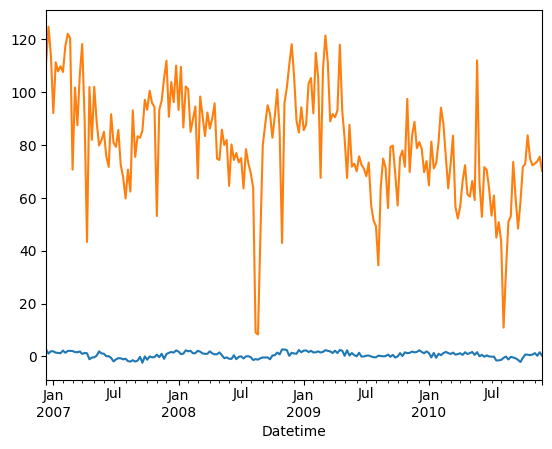

In [143]:
# Example Usage
plotter(power_consumption, "power", "W", "min")  # Weekly Mean
plotter(power_consumption, "power", "w", "max")  # Monthly Median

---

# Storage
In this last step, you're going to store the result of your dataset in `parquet` format.
- What does this format do? What is the benefit of using this?
- You'll need the data in the next exercise so make sure to store it on **day** level.

In [139]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.9 MB/s eta 0:00:00


In [140]:
# Your solution
power_consumption.to_parquet('power_consumption.parquet')

---